# Project: Investigate no show appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset is about taking appointment and whether the patient came or not. It has 14 variables(columns) including information about the patient like age, gender and his/her medical history. There is also some information about the appointment like the date and when it is booked.

### Questions that will be explored over this report

1- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

2- What is the patient age distribution of no-shows vs shows?

3- Which neighborhoods have the highest number of no-shows and the lowest one?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
sum(df.duplicated())

0

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df[df['Age']<= 0].count()

PatientId         3540
AppointmentID     3540
Gender            3540
ScheduledDay      3540
AppointmentDay    3540
Age               3540
Neighbourhood     3540
Scholarship       3540
Hipertension      3540
Diabetes          3540
Alcoholism        3540
Handcap           3540
SMS_received      3540
No-show           3540
dtype: int64

In [7]:
columns = ['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
for item in columns:
    print(item , sorted(df[item].unique()) ,'\n')

Gender ['F', 'M'] 

Age [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115] 

Scholarship [0, 1] 

Hipertension [0, 1] 

Diabetes [0, 1] 

Alcoholism [0, 1] 

Handcap [0, 1, 2, 3, 4] 

SMS_received [0, 1] 

No-show ['No', 'Yes'] 



## General observations
- no missing values
- no duplicated values
- The minimum value in "Age" column is negative, which is not correct
- Data type of "ScheduledDay" and "AppointmentDay" should be converted to datetime data type
- "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "SMS_received" and "No-show" need to be converted to boolean data type

### Data Cleaning 

- convert data type
- fix age values problem (age <= 0)
- drop patientID and AppointmentID columns, no need for them

In [8]:
df = df.drop(columns=['PatientId', 'AppointmentID'])

In [9]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64[ns]')
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64[ns]')

using this link: https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hipertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handcap         110527 non-null  int64         
 10  SMS_received    110527 non-null  int64         
 11  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [12]:
columns = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
for item in columns:
    df[item] = df[item].astype(bool)

using this link: https://stackoverflow.com/questions/64968646/pandas-convert-integer-zeroes-and-ones-to-boolean

In [13]:
df.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                 bool
Hipertension                bool
Diabetes                    bool
Alcoholism                  bool
Handcap                    int64
SMS_received                bool
No-show                   object
dtype: object

In [14]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,No


convert "No_show" column to "show" and change the values ('No' to 'True' and 'Yes' to 'False')

In [15]:
df.rename(columns = {'No-show': 'show'}, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,No


In [16]:
df['show'].replace({'No': True, 'Yes': False}, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,True
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,True
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,True
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,True
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,True


In [17]:
age_mean = int(df.Age.mean())
age_mean

37

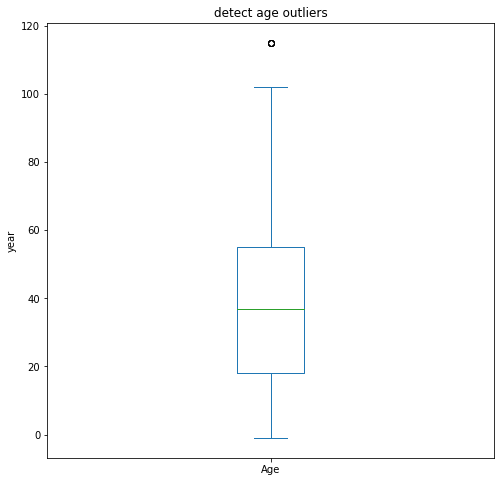

In [18]:
def draw_plot (title, ylabel):
    fig = df['Age'].plot(kind='box', figsize=(8,8));

    fig.set_title(title)
    fig.set_ylabel(ylabel)

    plt.show()
draw_plot ('detect age outliers', 'year')

In [19]:
print('number of columns < 0.01 std = ', len(df[df['Age'] < df['Age'].quantile(0.01)].axes[0]))
print('number of columns > 0.99 std = ', len(df[df['Age'] > df['Age'].quantile(0.99)].axes[0]))

number of columns < 0.01 std =  1
number of columns > 0.99 std =  900


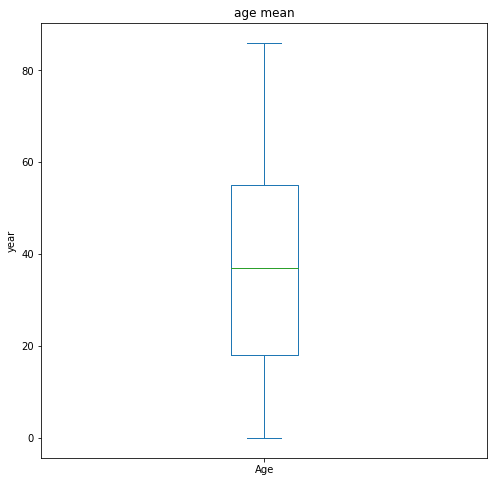

In [20]:
df['Age'].where(df['Age'] <= df['Age'].quantile(0.99), age_mean, inplace=True)
df['Age'].where(df['Age'] >= df['Age'].quantile(0.01), age_mean, inplace=True)

draw_plot ('age mean', 'year')

In [21]:
df.shape

(110527, 12)

In [22]:
df.Age.describe()

count    110527.000000
mean         36.656772
std          22.603180
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max          86.000000
Name: Age, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  bool          
 6   Hipertension    110527 non-null  bool          
 7   Diabetes        110527 non-null  bool          
 8   Alcoholism      110527 non-null  bool          
 9   Handcap         110527 non-null  int64         
 10  SMS_received    110527 non-null  bool          
 11  show            110527 non-null  bool          
dtypes: bool(6), datetime64[ns](2), int64(2), object(2)
memory usage: 5.7+ MB


In [24]:
df.to_csv('noshowappointments-cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

In [25]:
df = pd.read_csv('noshowappointments-cleaned.csv')
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,True
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,True
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,True
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,True
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,True


In [26]:
df_t = df[df['show'] == True]
df_f = df[df['show'] == False]

### Q1: What is the patient age distribution of no-shows vs shows?

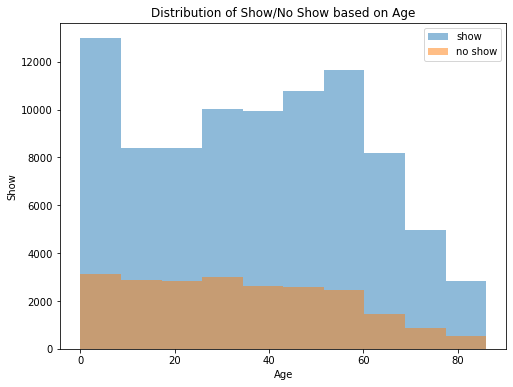

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_t['Age'], alpha=0.5, label='show')
ax.hist(df_f['Age'], alpha=0.5, label='no show')
ax.set_title('Distribution of Show/No Show based on Age')
ax.set_xlabel('Age')
ax.set_ylabel('Show')
ax.legend(loc='upper right')

plt.show()

no clue for a relationship between age and show/no show

In [28]:
age_df_shows = int(df_t['Age'].mean())
age_df_shows

37

In [29]:
age_df_no_shows = int(df_f['Age'].mean())
age_df_no_shows

33

### Q2: Which neighborhoods have the highest number of no-shows and the lowest one?

In [30]:
#explore the whole data
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [31]:
# Top 10 of no show
df_f['Neighbourhood'].value_counts().head(10)

JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
Name: Neighbourhood, dtype: int64

In [32]:
#Top 10 of show
df_t['Neighbourhood'].value_counts().head(10)

JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
CENTRO             2631
ITARARÉ            2591
TABUAZEIRO         2559
SANTO ANTÔNIO      2262
BONFIM             2223
Name: Neighbourhood, dtype: int64

## Q3: Did SMS-reminders affects the proportion of no-shows?

In [33]:
a = len(df_t[df_t['SMS_received'] == True])
b = len(df_t[df_t['SMS_received'] == False])
c = len(df_f[df_f['SMS_received'] == True])
d = len(df_f[df_f['SMS_received'] == False])

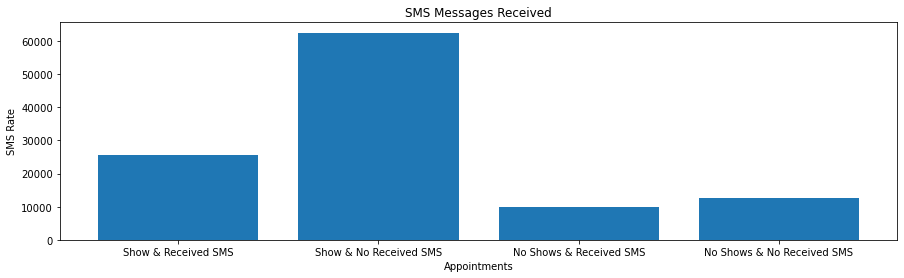

In [34]:
locations = [1, 2, 3, 4]
heights = [a, b, c , d]
labels = ['Show & Received SMS', 'Show & No Received SMS', 'No Shows & Received SMS', 'No Shows & No Received SMS']

bar1 = plt.bar(locations, heights, tick_label=labels)
plt.title('SMS Messages Received')
plt.xlabel('Appointments')
plt.ylabel('SMS Rate');
fig = plt.gcf()
fig.set_size_inches(15,4);

There is no strong relation between receiveing SMS and no show. The people who received a SMS did not show more often compared to those who did not receive a reminder. The people not having received a reminder has a much smaller proportion of no show.

<a id='conclusions'></a>
## Conclusions

- No clue for a relationship between age and show/no show.
- 37 is mean age of show.
- 33 is mean age of no show.
- There is no strong relation between receiveing SMS and no show.
- The people who received a SMS did not show more often compared to those who did not receive a reminder. The people not having received a reminder has a much smaller proportion of no show.
- Patient health desigations were charted to see if there is a relationship. Hypertension was the largest category in both segments due to the popularity of this designation. No correlations is found.
- The analysis is limited to trends and only shows value distributions. Need more statistical tests.